
Import Libraries and Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/creditcard.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(df.head())


Dataset loaded successfully!
Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458

Check for Missing Values and Explore Class Distribution


Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class distribution (0 = Normal, 1 = Fraud):
Class
0    284315
1       492
Name: count, dtype: int64


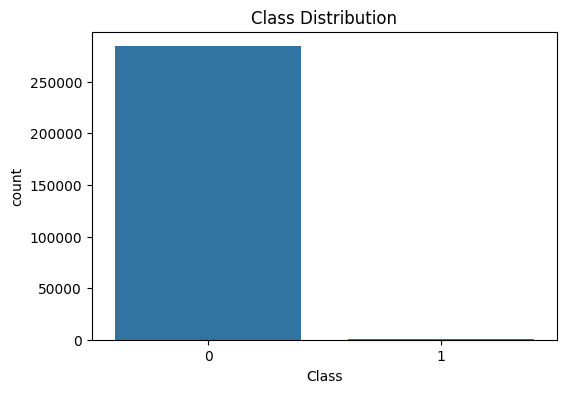

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Analyze class distribution
class_counts = df['Class'].value_counts()
print("\nClass distribution (0 = Normal, 1 = Fraud):")
print(class_counts)

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


Handle Class Imbalance by Undersampling

In [3]:
# Separate fraud and normal transactions
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

print(f"\nNumber of fraud transactions: {len(fraud)}")
print(f"Number of normal transactions: {len(normal)}")

# Undersample normal transactions to match the number of fraud transactions
normal_sample = normal.sample(n=len(fraud), random_state=1)

# Combine fraud and undersampled normal transactions
balanced_df = pd.concat([normal_sample, fraud], axis=0).sample(frac=1, random_state=1)

print(f"\nBalanced dataset shape: {balanced_df.shape}")
print("Class distribution in balanced dataset:")
print(balanced_df['Class'].value_counts())



Number of fraud transactions: 492
Number of normal transactions: 284315

Balanced dataset shape: (984, 31)
Class distribution in balanced dataset:
Class
1    492
0    492
Name: count, dtype: int64


Split Features and Target Variable


In [4]:
# Split dataset into features and target variable
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("\nSample of features:")
print(X.head())
print("\nSample of target values:")
print(y.head())



Features shape: (984, 30)
Target shape: (984,)

Sample of features:
            Time         V1        V2         V3         V4         V5  \
251881  155542.0   1.868226  1.363077  -1.994934   4.173516   1.239751   
59433    48839.0  -0.372224  0.850924   0.819148  -0.597507   0.941464   
221833  142719.0  -0.435970 -0.795462  -0.680776  -1.731704   1.434804   
150678   93879.0 -13.086519  7.352148 -18.256576  10.648505 -11.731476   
102782   68357.0   1.232604 -0.548931   1.087873   0.894082  -1.433055   

              V6         V7        V8        V9  ...       V20       V21  \
251881 -0.746186   0.572731 -0.131235 -1.551839  ... -0.172216 -0.301001   
59433   0.866622   0.429409  0.376960 -0.414962  ...  0.074709 -0.273044   
221833 -2.180876   0.369731 -0.318681 -1.723893  ...  0.195485  0.653145   
150678 -3.659167 -14.873658  8.810473 -5.418204  ... -1.376298  2.761157   
102782 -0.356797  -0.717492  0.003167 -0.100397  ... -0.576274 -0.448671   

             V22       V23   

Split Data into Training and Testing Sets

In [5]:
from sklearn.model_selection import train_test_split

# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 688 samples
Testing set size: 296 samples


 Train Logistic Regression Model and Make Predictions

In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Model training complete and predictions made.")


Model training complete and predictions made.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluate Model Performance

Accuracy: 0.9426

Confusion Matrix:
[[143   4]
 [ 13 136]]


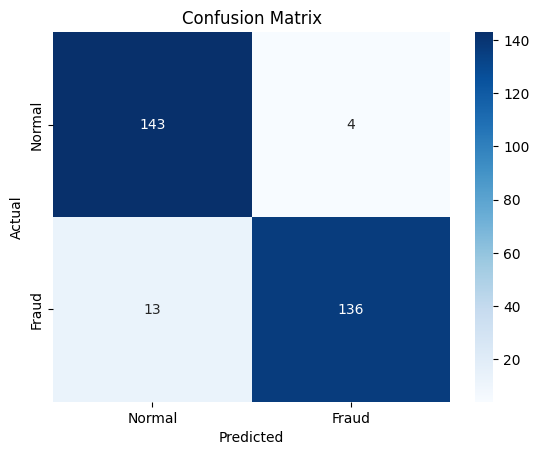


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       147
           1       0.97      0.91      0.94       149

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
